In [1]:
library(Seurat)
library(data.table)
library(ggplot2)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


In [2]:
datasetName = '/stor/public/hcad/heart_heart_Hua2020_2/heart_heart_Hua2020_2'

# organization

In [8]:
#load data
data.matrix <- readRDS("/stor/public/chenyx/THU_Heart/Donor2.count.rds")
metadata <-readRDS("/stor/public/chenyx/THU_Heart/Donor2.metadata.rds")

In [18]:
data.meta$organ <- 'Heart'
data.meta$region <- data.meta$Anatomical.Region.Level1
r <- as.character(metadata$Anatomical.Region.Level2)
sr <- r
sr[r=='LA'] <- "Left Atria"
r[r=='LA'] <- "Atria"
sr[r=='LV'] <- "Left Ventricle"
r[r=='LV'] <- "Ventricle"
data.meta$region <- r
data.meta$subregion <- sr
data.meta$sample_status <- 'Healthy'
data.meta$donor_ID <- 'Hua2020 Donor2'
data.meta$donor_gender <- 'Male'
data.meta$donor_age <- 50
data.meta$Protocol <- '10X'
data.meta$sample_ID <- paste('Hua2020 Donor2', lapply(rownames(data.meta),function(x) strsplit(x,'[.]')[[1]][1]))

In [25]:
data.meta <- data.meta[,!names(data.meta) %in% c('Anatomical.Region.Level1','Anatomical.Region.Level2','Anatomical.Region.Level3','cell.type')]

In [49]:
data.annotation <- metadata[,!names(metadata) %in% c('Anatomical.Region.Level1','Anatomical.Region.Level2')]

# Analysis

In [53]:
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, meta.data = data.meta, min.cells = 3,min.features = 200)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

In [54]:
dataobj

An object of class Seurat 
17555 features across 99484 samples within 1 assay 
Active assay: RNA (17555 features)

# Normalization

In [55]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix


# PCA

In [56]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  EBF1, MECOM, NEGR1, LDB2, PLXDC2, CDH19, ADGRB3, BICC1, TSHZ2, PID1 
	   EBF2, ELMO1, ACSM3, SPARCL1, ST6GALNAC3, C7, ADAMTSL2, ELN, FBN1, ABCA9 
	   COL15A1, PITPNC1, SCN7A, FLT1, DCN, C3, COL6A3, EPS8, TFPI, DENND2A 
Negative:  CTNNA3, SORBS2, PALLD, MLIP, SLC8A1, THSD4, DMD, NEXN, PDE4DIP, CACNB2 
	   SGCD, CDH2, PDLIM5, FGF12, LARGE, ROR1, SORBS1, AKAP6, MYO18B, CHRM2 
	   TECRL, FHOD3, TRDN, ANKRD1, PDE3A, CMYA5, MYOM1, TENM2, MAGI1, ACTN2 
PC_ 2 
Positive:  NPPB, MYL7, MYL4, NPPA, CACNA1E, L3MBTL4, KCNJ3, STAT4, PDE8B, NTN1 
	   AC009878.2, ZNF385B, LINC01411, CAMK1D, NMNAT2, TPM3, TBX5, GSG1L, RP11-236B18.2, CADM2 
	   RP11-766F14.2, MIR100HG, ROR2, RP11-457K10.1, ADAM19, GPSM2, GPATCH2L, OTOGL, LMCD1, TGFB2 
Negative:  FHL2, WBSCR17, RP11-532N4.2, PCDH7, C15orf41, CHN2, PHACTR1, NLGN1, NAV1, MYL2 
	   GCNT2, PRDM16, C1orf168, GRAMD1B, CDH13, ADRA1A, XPR1, AC011288.2, KIF26B, FHOD3 
	   TENM2, CTNNA3, THSD4, SPHKAP, SMYD2, LINC01428, ACOT11, RP11-400K9.4, CACNB

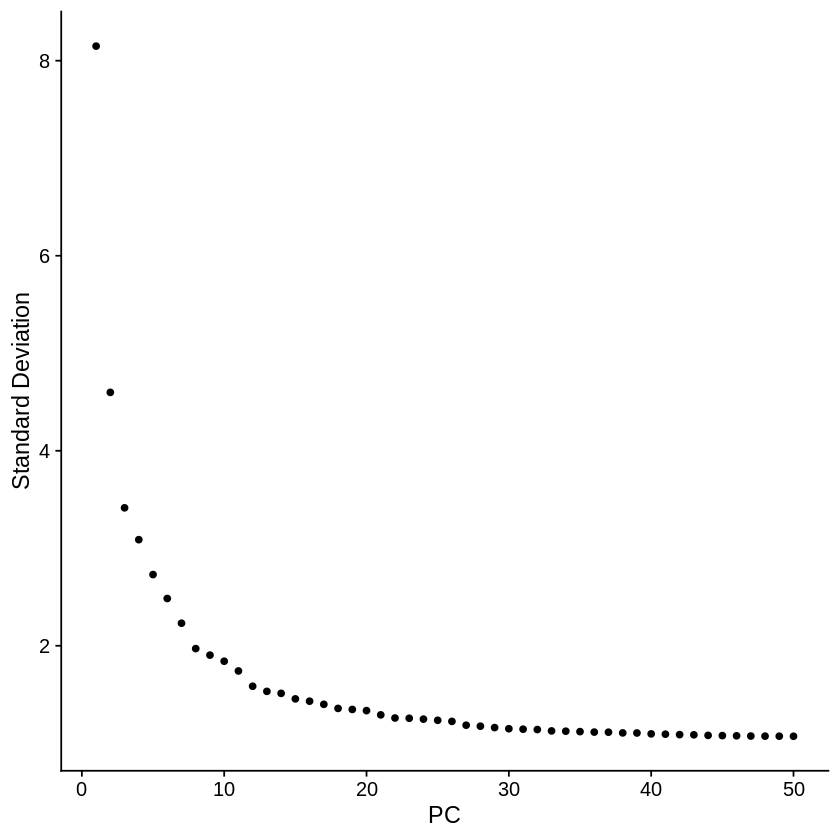

In [57]:
ElbowPlot(dataobj,50)
# select 30

In [58]:
# run Umap
dataobj <- RunUMAP(dataobj, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”16:23:12 UMAP embedding parameters a = 0.9922 b = 1.112
16:23:12 Read 99484 rows and found 30 numeric columns
16:23:12 Using Annoy for neighbor search, n_neighbors = 30
16:23:12 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
16:23:31 Writing NN index file to temp file /tmp/RtmpL9zjfZ/file7fc0b24530
16:23:31 Searching Annoy index using 1 thread, search_k = 3000
16:24:12 Annoy recall = 100%
16:24:12 Commencing smooth kNN distance calibration using 1 thread
16:24:18 Initializing from normalized Laplacian + noise
16:24:25 Commencing optimization

Warning message in if (label) {:
“the condition has length > 1 and only the first element will be used”Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

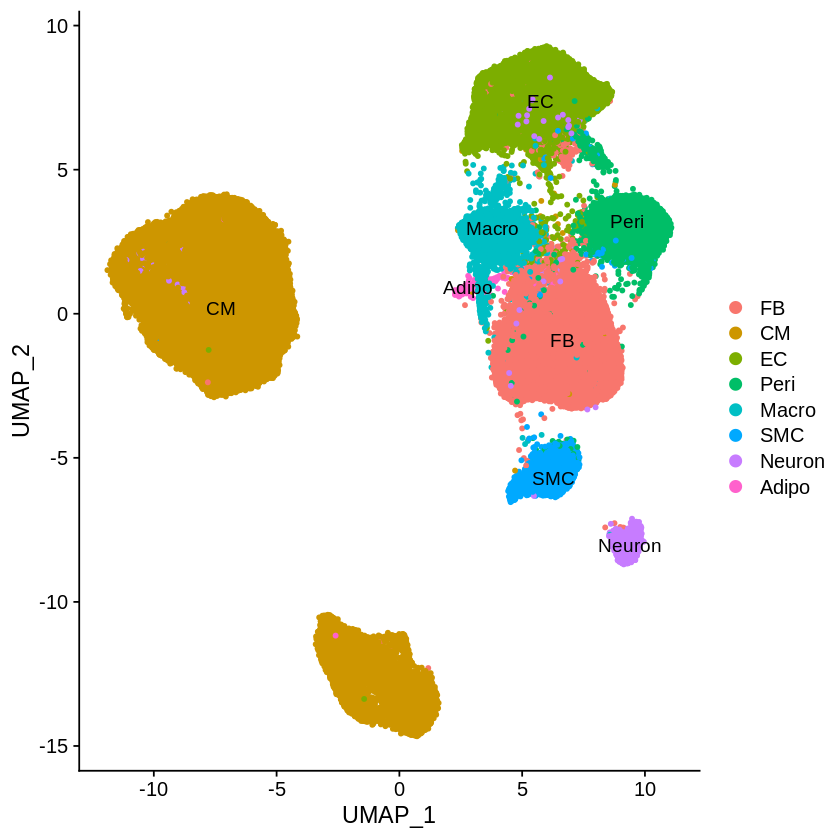

In [59]:
p_umap <- DimPlot(dataobj, reduction = "umap", group.by = 'cell.type',label = dataobj$orig.ident, pt.size=1)
p_umap

In [62]:
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap, width = 8, height = 5)

# Clustering

In [63]:
dataobj <- FindNeighbors(dataobj, dims = 1:30, k.param = 30)

Computing nearest neighbor graph
Computing SNN


In [66]:
dataobj <- FindClusters(dataobj, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 99484
Number of edges: 5175519

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9194
Number of communities: 15
Elapsed time: 59 seconds


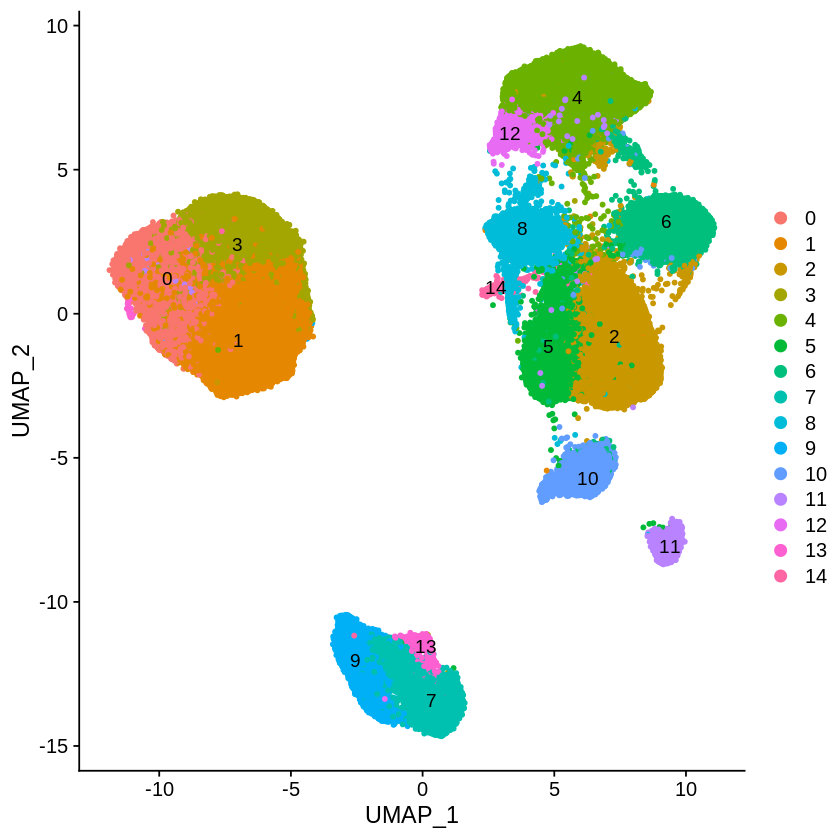

In [68]:
p_umap2 <-DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size=1)
p_umap2

In [69]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap2, width = 8, height = 5)

In [70]:
dataobj.markers <- FindAllMarkers(dataobj,  test.use='wilcox', min.pct=0.2, thresh.use=0.2, min.diff.pct=0.1, only.positive=TRUE, return.thresh=0.05)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14


In [71]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

# Annotation

In [111]:
dataobj.markers[dataobj.markers['cluster']==14,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GPAM,0.000000e+00,3.081208,0.591,0.023,0.000000e+00,14,GPAM
FASN,0.000000e+00,2.930650,0.587,0.030,0.000000e+00,14,FASN
ELOVL6,0.000000e+00,2.814328,0.465,0.015,0.000000e+00,14,ELOVL6
MLXIPL,0.000000e+00,2.367187,0.554,0.035,0.000000e+00,14,MLXIPL
SCD,0.000000e+00,2.362904,0.479,0.009,0.000000e+00,14,SCD
MOGAT1,0.000000e+00,2.286323,0.340,0.016,0.000000e+00,14,MOGAT1
OLFM2,0.000000e+00,2.042510,0.330,0.010,0.000000e+00,14,OLFM2
APBB1IP,0.000000e+00,1.829891,0.363,0.018,0.000000e+00,14,APBB1IP
PNPLA3,0.000000e+00,1.635086,0.244,0.001,0.000000e+00,14,PNPLA3


In [112]:
dataobj.markers[dataobj.markers['gene']=='',]

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>


In [4]:
new.cluster.ids <- c('Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',# 0
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYH7',
                     'Heart-Connective Tissue-Fibrocyte-DCN',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Epithelial Tissue-Endocardial cell-VWF',
                     'Heart-Connective Tissue-Fibrocyte-DCN',#5
                     'Heart-Connective Tissue-Pericyte-EGFLAM',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Connective Tissue-Macrophage-C1QA',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL4',
                     'Heart-Musle Tissue-Smooth muscle cell-ACTA2',#10
                     'Heart-Nerve Tissue-Neuron-NRXN1',
                     'Heart-Epithelial Tissue-Endothelial cell-EMCN',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Connective Tissue-Adipocyte-GPAM'
                     )

Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

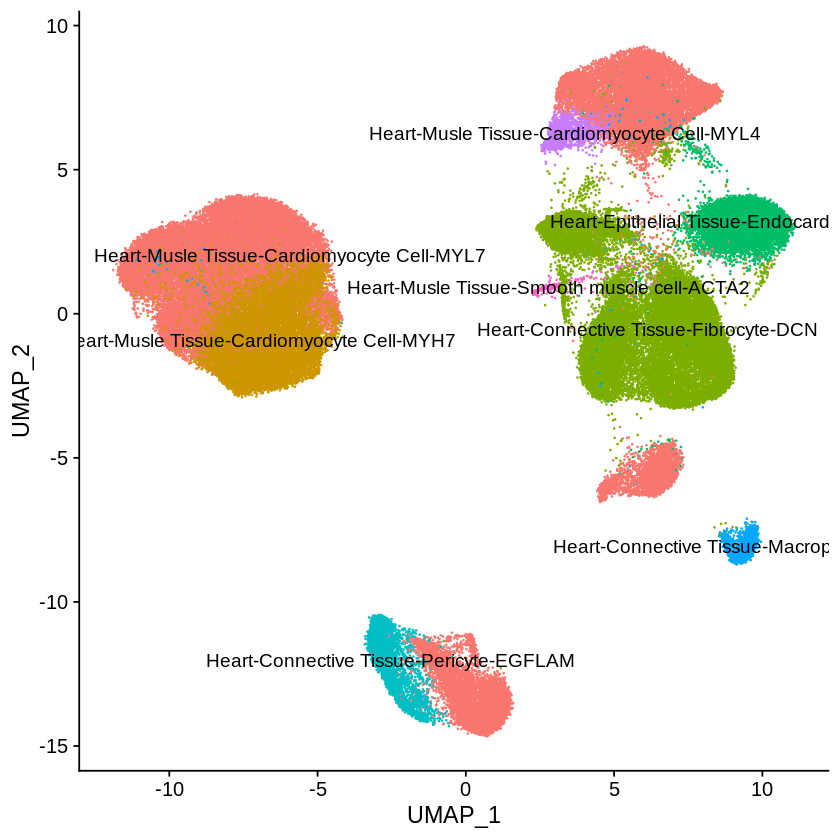

In [5]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 0.1) + NoLegend()
plot

In [6]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [11]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [12]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [13]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

In [116]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

# Update annotation

In [61]:
dataobj <- readRDS("/stor/public/hcad/db_v1/heart_heart_Hua2020_2/heart_heart_Hua2020_2.seuratobj.dbupload_v1.rds")

In [62]:
dataobj

An object of class Seurat 
43878 features across 99484 samples within 1 assay 
Active assay: RNA (43878 features, 0 variable features)

In [74]:
table(dataobj$original_name[dataobj$hcad_name == "Heart-Connective tissue-Macrophage-C1QA"])


    FB  Macro Neuron   Peri    SMC 
     5      1   1531      1      1 

In [64]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Macro"] <- "Macrophage"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Macro"] <- "Connective tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Macro"] <- "CD74"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Macro"] <- 'Heart-Connective tissue-Macrophage-CD74'

In [65]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Peri"] <- "Pericyte"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Peri"] <- "Epithelial tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Peri"] <- "EGFLAM"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN"& dataobj$original_name=="Peri"] <- 'Heart-Epithelial tissue-Pericyte-EGFLAM'

In [67]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="EC"] <- "Endocardial cell"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="EC"] <- "Epithelial tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="EC"] <- "VWF"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="EC"] <- 'Heart-Epithelial tissue-Endocardial cell-VWF'

In [68]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="SMC"] <- "Smooth muscle cell"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="SMC"] <- "Muscle tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="SMC"] <- "ACTA2"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"& dataobj$original_name=="SMC"] <- 'Heart-Muscle tissue-Smooth muscle cell-ACTA2'

In [70]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Epithelial tissue-Endocardial cell-VWF"& dataobj$original_name=="Peri"] <- "Pericyte"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Epithelial tissue-Endocardial cell-VWF"& dataobj$original_name=="Peri"] <- "EGFLAM"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Epithelial tissue-Endocardial cell-VWF"& dataobj$original_name=="Peri"] <- 'Heart-Epithelial tissue-Pericyte-EGFLAM'

In [73]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Muscle tissue-Smooth muscle cell-ACTA2"& dataobj$original_name=="Adipo"] <- "Adipocyte"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Muscle tissue-Smooth muscle cell-ACTA2"& dataobj$original_name=="Adipo"] <- "Connective tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Muscle tissue-Smooth muscle cell-ACTA2"& dataobj$original_name=="Adipo"] <- "ADD1"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Muscle tissue-Smooth muscle cell-ACTA2"& dataobj$original_name=="Adipo"] <- 'Heart-Connective tissue-Adipocyte-ADD1'

In [75]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Connective tissue-Macrophage-C1QA"] <- "Neuron"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Connective tissue-Macrophage-C1QA"] <- "Nerve tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Connective tissue-Macrophage-C1QA"] <- "NRXN1"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Connective tissue-Macrophage-C1QA"] <- 'Heart-Nerve tissue-Neuron-NRXN1'

In [76]:
saveRDS(dataobj, "/stor/public/hcad/db_v1.1/heart_heart_Hua2020_2/heart_heart_Hua2020_2.seuratobj.dbupload_v1.rds")